In [2]:
# Import libraries & load dataset

import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv(r"C:\Users\DELL\Downloads\IPL2025Batters.csv")


In [3]:
df.shape


(156, 14)

In [4]:
# Display first 10 players
df.head(10)


,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30
8,K L Rahul,DC,539,13,13,3,112*,53.90,360,149.72,1,3,52,21
9,Jos Buttler,GT,538,14,13,4,97*,59.78,330,163.03,0,5,52,24


In [5]:
#Display last 10 players
df.tail(10)


,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
146,Spencer Johnson,KKR,2,4,2,2,1*,-,4,50.00,0,0,0,0
147,Arshdeep Singh,PBKS,2,17,2,1,1*,2.00,6,33.33,0,0,0,0
148,Varun Chakaravarthy,KKR,1,13,1,1,1*,-,1,100.00,0,0,0,0
149,V Satyanarayana Penmetsa,MI,1,2,1,1,1*,-,1,100.00,0,0,0,0
150,Karn Sharma,MI,1,6,1,1,1*,-,1,100.00,0,0,0,0
151,Khaleel Ahmed,CSK,1,14,2,2,1*,-,2,50.00,0,0,0,0
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,0,0,0,0
154,Digvesh Singh,LSG,1,13,2,1,1,1.00,3,33.33,0,0,0,0
155,Manoj Bhandage,RCB,1,1,1,0,1,1.00,4,25.00,0,0,0,0


In [6]:
#View column names
df.columns


Index(['Player Name', 'Team', 'Runs', 'Matches', 'Inn', 'No', 'HS', 'AVG',
       'BF', 'SR', '100s', '50s', '4s', '6s'],
      dtype='object')

In [7]:
# View data types
df.dtypes


Player Name     object
Team            object
Runs             int64
Matches          int64
Inn              int64
No               int64
HS              object
AVG             object
BF               int64
SR             float64
100s             int64
50s              int64
4s               int64
6s               int64
dtype: object

In [8]:
#Dataset overview

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB


In [9]:
# Category understanding
df["Team"].nunique()


10

In [10]:
# List all team names
df["Team"].unique()


array(['GT', 'MI', 'RCB', 'LSG', 'PBKS', 'RR', 'DC', 'SRH', 'KKR', 'CSK'],
      dtype=object)

In [11]:
#C Players per team
df["Team"].value_counts()


Team
CSK     19
RR      17
DC      17
MI      16
KKR     15
LSG     15
PBKS    15
GT      14
RCB     14
SRH     14
Name: count, dtype: int64

In [12]:
# Players with zero matches
df[df["Matches"] == 0]


,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s


In [13]:
# Missing values check- Cleaning needed before analysis
df.isna().sum()


Player Name    0
Team           0
Runs           0
Matches        0
Inn            0
No             0
HS             0
AVG            0
BF             0
SR             0
100s           0
50s            0
4s             0
6s             0
dtype: int64

In [14]:
#Numeric vs categorical columns- Decide analysis approach
df.select_dtypes(include=np.number).columns, df.select_dtypes(exclude=np.number).columns



(Index(['Runs', 'Matches', 'Inn', 'No', 'BF', 'SR', '100s', '50s', '4s', '6s'], dtype='object'),
 Index(['Player Name', 'Team', 'HS', 'AVG'], dtype='object'))

In [16]:
# Rename HS → Highest_Score
df = df.rename(columns={"HS": "Highest_Score"})


In [17]:
df.head(1)

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21


In [18]:
# Players with >600 runs
df[df["Runs"] > 600]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39


In [19]:
# Strike rate >150
df[df["SR"] > 150]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30
9,Jos Buttler,GT,538,14,13,4,97*,59.78,330,163.03,0,5,52,24
10,Nicholas Pooran,LSG,524,14,14,2,87*,43.67,267,196.25,0,5,45,40
11,Heinrich Klaasen,SRH,487,13,13,2,105*,44.27,282,172.69,1,1,42,25


In [20]:
# At least one century
df[df["100s"] >= 1]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
8,K L Rahul,DC,539,13,13,3,112*,53.90,360,149.72,1,3,52,21
11,Heinrich Klaasen,SRH,487,13,13,2,105*,44.27,282,172.69,1,1,42,25
12,Priyansh Arya,PBKS,475,17,17,0,103,27.94,265,179.24,1,2,55,25
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,1,2,46,28
23,Ishan Kishan,SRH,354,14,13,3,106*,35.40,232,152.58,1,1,33,15
36,Rishabh Pant,LSG,269,14,13,2,118*,24.45,202,133.16,1,1,23,16
39,Vaibhav Suryavanshi,RR,252,7,7,0,101,36.00,122,206.55,1,1,18,24


In [21]:
#GT team players
df[df["Team"] == "GT"]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
9,Jos Buttler,GT,538,14,13,4,97*,59.78,330,163.03,0,5,52,24
33,Sherfane Rutherford,GT,291,13,11,2,46,32.33,185,157.29,0,0,22,18
58,Shahrukh Khan,GT,179,15,11,5,57,29.83,100,179.00,0,1,11,13
67,Washington Sundar,GT,133,6,5,0,49,26.60,80,166.25,0,0,10,7
75,Rahul Tewatia,GT,99,15,12,4,24*,12.38,59,167.79,0,0,6,7
96,Rashid Khan,GT,40,15,8,3,12,8.00,28,142.85,0,0,2,3
101,Mohd Arshad Khan,GT,23,9,5,3,20,11.50,19,121.05,0,0,0,3
105,Kusal Mendis,GT,20,1,1,0,20,20.00,10,200.00,0,0,1,2


In [22]:
# >10 matches & >500 runs
df[(df["Matches"] > 10) & (df["Runs"] > 500)]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30
8,K L Rahul,DC,539,13,13,3,112*,53.90,360,149.72,1,3,52,21
9,Jos Buttler,GT,538,14,13,4,97*,59.78,330,163.03,0,5,52,24


In [23]:
# Average above 50
df[pd.to_numeric(df["AVG"], errors="coerce") > 50]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39
8,K L Rahul,DC,539,13,13,3,112*,53.90,360,149.72,1,3,52,21
9,Jos Buttler,GT,538,14,13,4,97*,59.78,330,163.03,0,5,52,24
56,Tim David,RCB,187,12,9,6,50*,62.33,101,185.14,0,1,16,14


In [24]:
# Zero 50s & zero 100s
df[(df["50s"] == 0) & (df["100s"] == 0)]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
31,Tristan Stubbs,DC,300,14,13,7,41*,50.00,199,150.75,0,0,25,11
33,Sherfane Rutherford,GT,291,13,11,2,46,32.33,185,157.29,0,0,22,18
37,Axar Patel,DC,263,12,11,1,43,26.30,167,157.48,0,0,23,15
40,Naman Dhir,MI,252,16,12,4,46,31.50,138,182.60,0,0,24,13
42,Sunil Narine,KKR,246,12,12,1,44,22.36,144,170.83,0,0,25,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Khaleel Ahmed,CSK,1,14,2,2,1*,-,2,50.00,0,0,0,0
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,0,0,0,0
154,Digvesh Singh,LSG,1,13,2,1,1,1.00,3,33.33,0,0,0,0


In [25]:
# Not-out players
df[df["No"] > 0]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,V Satyanarayana Penmetsa,MI,1,2,1,1,1*,-,1,100.00,0,0,0,0
150,Karn Sharma,MI,1,6,1,1,1*,-,1,100.00,0,0,0,0
151,Khaleel Ahmed,CSK,1,14,2,2,1*,-,2,50.00,0,0,0,0
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0


In [26]:
# More than 20 sixes
df[df["6s"] > 20]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,0,6,43,39
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30
8,K L Rahul,DC,539,13,13,3,112*,53.90,360,149.72,1,3,52,21
9,Jos Buttler,GT,538,14,13,4,97*,59.78,330,163.03,0,5,52,24
10,Nicholas Pooran,LSG,524,14,14,2,87*,43.67,267,196.25,0,5,45,40


In [27]:
# Balls faced <100
df[df["BF"] < 100]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s
60,Abdul Samad,LSG,164,13,12,4,45,20.50,93,176.34,0,0,8,14
61,Marcus Stoinis,PBKS,160,13,11,5,44*,26.67,86,186.04,0,0,8,15
65,Vipraj Nigam,DC,142,14,8,1,39,20.29,79,179.74,0,0,15,8
67,Washington Sundar,GT,133,6,5,0,49,26.60,80,166.25,0,0,10,7
68,Ruturaj Gaikwad,CSK,122,5,5,0,63,24.40,81,150.61,0,2,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Khaleel Ahmed,CSK,1,14,2,2,1*,-,2,50.00,0,0,0,0
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,0,0,0,0
154,Digvesh Singh,LSG,1,13,2,1,1,1.00,3,33.33,0,0,0,0


In [28]:
low_usage = df[df["BF"] < 100]

In [30]:
print("Low usage players:")
print(low_usage[["Player Name","BF"]])

Low usage players:
           Player Name  BF
60         Abdul Samad  93
61      Marcus Stoinis  86
65        Vipraj Nigam  79
67   Washington Sundar  80
68     Ruturaj Gaikwad  81
..                 ...  ..
151      Khaleel Ahmed   2
152       Mohit Sharma   3
153   Donovan Ferreira   3
154      Digvesh Singh   3
155     Manoj Bhandage   4

[92 rows x 2 columns]


In [31]:
# Sort players by Runs (descending)- Create a batting leaderboard- Top run-scorers appear first (Rank-style view).
df_sorted_runs = df.sort_values("Runs", ascending=False)

In [33]:
df_sorted_runs = df.sort_values("Runs", ascending=False)
print("Players sorted by Runs (Top 5):")
print(df_sorted_runs[["Player Name", "Runs"]].head())


Players sorted by Runs (Top 5):
         Player Name  Runs
0      Sai Sudharsan   759
1  Surya Kumar Yadav   717
2        Virat Kohli   657
3       Shubman Gill   650
4     Mitchell Marsh   627


In [34]:
# STEP 26: Top 5 run scorers-best batters of the season by volume.
top5 = df_sorted_runs.head(5)
print("Top 5 Run Scorers:")
print(top5[["Player Name", "Team", "Runs"]])


Top 5 Run Scorers:
         Player Name Team  Runs
0      Sai Sudharsan   GT   759
1  Surya Kumar Yadav   MI   717
2        Virat Kohli  RCB   657
3       Shubman Gill   GT   650
4     Mitchell Marsh  LSG   627


In [36]:
#STEP 27: Sort by Strike Rate, then Runs-Prefer aggressive batters first, then consistency-High SR + high runs
df_sr_runs = df.sort_values(["SR", "Runs"], ascending=[False, False])
print("Sorted by SR then Runs:")
print(df_sr_runs[["Player Name", "SR", "Runs"]].head())


Sorted by SR then Runs:
          Player Name      SR  Runs
124     Kwena Maphaka  400.00     8
137   Lockie Ferguson  400.00     4
129        Akash Deep  300.00     6
84   Romario Shepherd  291.66    70
109     Jamie Overton  214.28    15


In [37]:
#STEP 28: Player with highest batting average- Most consistent scorer (stays not-out / scores reliably).
highest_avg_player = df.loc[df["AVG"].idxmax()]
print("Player with Highest Average:")
print(highest_avg_player[["Player Name", "AVG"]])



Player with Highest Average:
Player Name    Ramandeep Singh
AVG                       9.40
Name: 95, dtype: object


In [38]:
# STEP 29: Rank players based on Runs
df["Runs_Rank"] = df["Runs"].rank(ascending=False)
print("Runs Rank (Top 5):")
print(df[["Player Name", "Runs", "Runs_Rank"]].sort_values("Runs_Rank").head())


Runs Rank (Top 5):
         Player Name  Runs  Runs_Rank
0      Sai Sudharsan   759        1.0
1  Surya Kumar Yadav   717        2.0
2        Virat Kohli   657        3.0
3       Shubman Gill   650        4.0
4     Mitchell Marsh   627        5.0


In [39]:
#STEP 30: Rank players within each team-Shows team hierarchy (who is #1 batter in each team)
df["Team_Runs_Rank"] = df.groupby("Team")["Runs"].rank(ascending=False)
print("Team-wise Runs Rank (Sample):")
print(df[["Player Name", "Team", "Runs", "Team_Runs_Rank"]].head())


Team-wise Runs Rank (Sample):
         Player Name Team  Runs  Team_Runs_Rank
0      Sai Sudharsan   GT   759             1.0
1  Surya Kumar Yadav   MI   717             1.0
2        Virat Kohli  RCB   657             1.0
3       Shubman Gill   GT   650             2.0
4     Mitchell Marsh  LSG   627             1.0


In [40]:
# STEP 31: Player with lowest strike rate- Player scoring slowly (may hurt T20 tempo)
slowest = df.loc[df["SR"].idxmin()]
print("Lowest Strike Rate Player:")
print(slowest[["Player Name", "SR"]])


Lowest Strike Rate Player:
Player Name    Manoj Bhandage
SR                       25.0
Name: 155, dtype: object


In [41]:
# STEP 32: Sort by number of sixes- Pure power hitters

df_sixes = df.sort_values("6s", ascending=False)
print("Top Six Hitters:")
print(df_sixes[["Player Name", "6s"]].head())


Top Six Hitters:
          Player Name  6s
10    Nicholas Pooran  40
5        Shreyas Iyer  39
1   Surya Kumar Yadav  38
4      Mitchell Marsh  37
7   Prabhsimran Singh  30


In [42]:
#STEP 33: Total runs by each team- Overall batting strength of each team
team_runs = df.groupby("Team")["Runs"].sum()
print("Total Runs per Team:")
print(team_runs)



Total Runs per Team:
Team
CSK     2315
DC      2386
GT      2766
KKR     1886
LSG     2598
MI      2802
PBKS    3000
RCB     2539
RR      2496
SRH     2378
Name: Runs, dtype: int64


In [43]:
# STEP 34: Average strike rate per team- Which team bats fastest overall.
team_avg_sr = df.groupby("Team")["SR"].mean()
print("Average Strike Rate per Team:")
print(team_avg_sr)


Average Strike Rate per Team:
Team
CSK     130.346842
DC      119.012941
GT      142.952857
KKR     123.555333
LSG     140.846667
MI      137.221250
PBKS    144.912667
RCB     141.392857
RR      137.220000
SRH     129.773571
Name: SR, dtype: float64


In [44]:
# STEP 35: Maximum runs scored by a player in each team-Team’s top individual performer
max_runs_team = df.groupby("Team")["Runs"].max()
print("Max Runs by Player in Each Team:")
print(max_runs_team) 

Max Runs by Player in Each Team:
Team
CSK     357
DC      539
GT      759
KKR     390
LSG     627
MI      717
PBKS    604
RCB     657
RR      559
SRH     487
Name: Runs, dtype: int64


In [47]:
#STEP 36: Average batting average per team-Consistency comparison across teams.

# Replace '-' with NaN and convert AVG to numeric
df["AVG"] = df["AVG"].replace("-", np.nan)
df["AVG"] = pd.to_numeric(df["AVG"], errors="coerce")

# Now calculate average batting average per team
team_avg_avg = df.groupby("Team")["AVG"].mean()
print("Average Batting Average per Team:")
print(team_avg_avg)


Average Batting Average per Team:
Team
CSK     21.945294
DC      21.087500
GT      24.907692
KKR     21.290769
LSG     21.291429
MI      27.981538
PBKS    22.585714
RCB     27.242857
RR      21.546923
SRH     21.764286
Name: AVG, dtype: float64


In [ ]:
# STEP 37: Count players per team-

In [48]:
team_player_count = df.groupby("Team")["Player Name"].count()
print("Players per Team:")
print(team_player_count)


Players per Team:
Team
CSK     19
DC      17
GT      14
KKR     15
LSG     15
MI      16
PBKS    15
RCB     14
RR      17
SRH     14
Name: Player Name, dtype: int64


In [49]:
#STEP 38: Team with highest total sixes-Most explosive batting team
team_sixes = df.groupby("Team")["6s"].sum()
print("Team Sixes:")
print(team_sixes)

print("Team with most sixes:", team_sixes.idxmax())


Team Sixes:
Team
CSK     102
DC      109
GT      124
KKR     101
LSG     152
MI      142
PBKS    173
RCB     125
RR      146
SRH     120
Name: 6s, dtype: int64
Team with most sixes: PBKS


In [50]:
# STEP 39: Team with highest average strike rate

print("Fastest scoring team:", team_avg_sr.idxmax())


Fastest scoring team: PBKS


In [51]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s,Runs_Rank,Team_Runs_Rank
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21,1.0,1.0
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38,2.0,1.0
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19,3.0,1.0
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24,4.0,2.0
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,5.0,1.0


In [52]:
# STEP 40: Top scorer from each team

top_scorer_each_team = df.loc[df.groupby("Team")["Runs"].idxmax()]
print("Top Scorer from Each Team:")
print(top_scorer_each_team[["Team", "Player Name", "Runs"]])


Top Scorer from Each Team:
    Team        Player Name  Runs
22   CSK        Shivam Dube   357
8     DC          K L Rahul   539
0     GT      Sai Sudharsan   759
18   KKR     Ajinkya Rahane   390
4    LSG     Mitchell Marsh   627
1     MI  Surya Kumar Yadav   717
5   PBKS       Shreyas Iyer   604
2    RCB        Virat Kohli   657
6     RR   Yashasvi Jaiswal   559
11   SRH   Heinrich Klaasen   487


In [53]:
# STEP 41: Team-wise total centuries-
team_centuries = df.groupby("Team")["100s"].sum()
print("Centuries per Team:")
print(team_centuries)


Centuries per Team:
Team
CSK     0
DC      1
GT      1
KKR     0
LSG     2
MI      0
PBKS    1
RCB     0
RR      1
SRH     3
Name: 100s, dtype: int64


In [54]:
# STEP 42: Team-wise total matches played
team_matches = df.groupby("Team")["Matches"].sum()
print("Matches played by team batters:")
print(team_matches)


Matches played by team batters:
Team
CSK     153
DC      149
GT      156
KKR     139
LSG     155
MI      165
PBKS    176
RCB     149
RR      161
SRH     136
Name: Matches, dtype: int64


In [55]:
#STEP 43: Replace '-' in AVG with NaN-DATA CLEANING- Invalid values removed at erlier step

print("Before cleaning AVG:")
print(df["AVG"].head())




Before cleaning AVG:
0    54.21
1    65.18
2    54.75
3    50.00
4    48.23
Name: AVG, dtype: float64


In [56]:
df["AVG"] = df["AVG"].replace("-", np.nan)

print("After cleaning AVG:")
print(df["AVG"].head())

After cleaning AVG:
0    54.21
1    65.18
2    54.75
3    50.00
4    48.23
Name: AVG, dtype: float64


In [57]:
# STEP 44: Convert AVG to numeric
df["AVG"] = pd.to_numeric(df["AVG"], errors="coerce")
print(df["AVG"].dtype)


float64


In [58]:
print(df["AVG"].head())

0    54.21
1    65.18
2    54.75
3    50.00
4    48.23
Name: AVG, dtype: float64


In [61]:
# STEP 45: Cleaning Highest_Score Column (* removal)- clean numeric data, while original column can still exist

df["Highest_Score_Num"] = (
    df["Highest_Score"]
    .astype(str)               # ensure string operations
    .str.replace("*", "", regex=False)  # remove not-out marker
    .astype(int)               # convert to integer
)


In [62]:
print(df[["Highest_Score", "Highest_Score_Num"]].head())


  Highest_Score  Highest_Score_Num
0          108*                108
1           73*                 73
2           73*                 73
3           93*                 93
4           117                117


In [63]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s,Runs_Rank,Team_Runs_Rank,Highest_Score_Num
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21,1.0,1.0,108
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38,2.0,1.0,73
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19,3.0,1.0,73
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24,4.0,2.0,93
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,5.0,1.0,117


In [66]:
# STEP 46: Removing Players with Less Than 3 Innings

df.shape[0]

156

In [67]:
df = df[df["Inn"] >= 3]

In [68]:
df.shape[0]

117

In [70]:
# STEP 47: Detecting Outliers Using IQR (Runs)-Players with abnormally high or low runs
Q1 = df["Runs"].quantile(0.25)
Q3 = df["Runs"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df["Runs"] < Q1 - 1.5 * IQR) |
    (df["Runs"] > Q3 + 1.5 * IQR)
]

print(outliers[["Player Name", "Runs"]])


         Player Name  Runs
0      Sai Sudharsan   759
1  Surya Kumar Yadav   717


In [71]:
# STEP 48: Removing Duplicate Players-

before = df.shape[0]

df = df.drop_duplicates(subset=["Player Name"])

after = df.shape[0]

print(f"Duplicates removed: {before-after}")


Duplicates removed: 0


In [73]:
# STEP 49: Standardizing Team Names- normalized categorical dimensions early
df["Team"] = df["Team"].str.upper()



In [74]:
df["Team"]

0       GT
1       MI
2      RCB
3       GT
4      LSG
      ... 
128    CSK
131     DC
134     GT
138    RCB
143    SRH
Name: Team, Length: 117, dtype: object

In [75]:
# STEP 50: Sanity Check- Always validate after cleaning.
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 143
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player Name        117 non-null    object 
 1   Team               117 non-null    object 
 2   Runs               117 non-null    int64  
 3   Matches            117 non-null    int64  
 4   Inn                117 non-null    int64  
 5   No                 117 non-null    int64  
 6   Highest_Score      117 non-null    object 
 7   AVG                116 non-null    float64
 8   BF                 117 non-null    int64  
 9   SR                 117 non-null    float64
 10  100s               117 non-null    int64  
 11  50s                117 non-null    int64  
 12  4s                 117 non-null    int64  
 13  6s                 117 non-null    int64  
 14  Runs_Rank          117 non-null    float64
 15  Team_Runs_Rank     117 non-null    float64
 16  Highest_Score_Num  117 non-null

In [76]:
# STEP 51: Runs Per Match (Consistency Metric)- Who scores consistently, not just heavily?
df["Runs_per_Match"] = df["Runs"] / df["Matches"]
print(df[["Player Name", "Runs_per_Match"]].head())



         Player Name  Runs_per_Match
0      Sai Sudharsan       50.600000
1  Surya Kumar Yadav       44.812500
2        Virat Kohli       43.800000
3       Shubman Gill       43.333333
4     Mitchell Marsh       48.230769


In [78]:
# STEP 52: Boundary Runs
df["Boundary_Runs"] = df["4s"]*4 + df["6s"]*6

In [79]:
print("Sample before adding Boundary_Runs:")
print(df[["Player Name", "4s", "6s", "Runs"]].head(5))

Sample before adding Boundary_Runs:
         Player Name  4s  6s  Runs
0      Sai Sudharsan  88  21   759
1  Surya Kumar Yadav  69  38   717
2        Virat Kohli  66  19   657
3       Shubman Gill  62  24   650
4     Mitchell Marsh  56  37   627


In [80]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,100s,50s,4s,6s,Runs_Rank,Team_Runs_Rank,Highest_Score_Num,Runs_per_Match,Boundary_Runs
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21,1.0,1.0,108,50.600000,478
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38,2.0,1.0,73,44.812500,504
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19,3.0,1.0,73,43.800000,378
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24,4.0,2.0,93,43.333333,392
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,5.0,1.0,117,48.230769,446


In [81]:
print(df[["Player Name", "4s", "6s", "Boundary_Runs", "Runs"]].head(5))

         Player Name  4s  6s  Boundary_Runs  Runs
0      Sai Sudharsan  88  21            478   759
1  Surya Kumar Yadav  69  38            504   717
2        Virat Kohli  66  19            378   657
3       Shubman Gill  62  24            392   650
4     Mitchell Marsh  56  37            446   627


In [82]:
# STEP 53: Boundary Run Percentage- High % → power hitter,-Low % → strike rotator
df["Boundary_Run_%"] = (df["Boundary_Runs"] / df["Runs"]) * 100


In [83]:
print(df[["Player Name", "4s", "6s", "Boundary_Runs", "Runs","Boundary_Run_%"]].head(5))

         Player Name  4s  6s  Boundary_Runs  Runs  Boundary_Run_%
0      Sai Sudharsan  88  21            478   759       62.977602
1  Surya Kumar Yadav  69  38            504   717       70.292887
2        Virat Kohli  66  19            378   657       57.534247
3       Shubman Gill  62  24            392   650       60.307692
4     Mitchell Marsh  56  37            446   627       71.132376


In [84]:
# STEP 54: Scorer Category (Low / Medium / High),Makes dashboards readable,Enables segmentation
#High → Season anchor,Medium → Support batter,Low → Fringe player

df["Scorer_Category"] = pd.cut(
    df["Runs"],
    bins=[-1, 199, 500, np.inf],
    labels=["Low", "Medium", "High"]
)


In [88]:
df.tail()

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,50s,4s,6s,Runs_Rank,Team_Runs_Rank,Highest_Score_Num,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category
128,Noor Ahmad,CSK,7,14,6,2,2*,1.75,17,41.17,...,0,0,0,128.0,18.0,2,0.500000,0,0.0,Low
131,Mitchell Starc,DC,6,11,6,4,2*,3.00,10,60.00,...,0,0,0,131.5,14.0,2,0.545455,0,0.0,Low
134,Sai Kishore,GT,5,15,3,0,3,1.67,10,50.00,...,0,0,0,135.5,13.0,3,0.333333,0,0.0,Low
138,Yash Dayal,RCB,4,15,3,1,3,2.00,8,50.00,...,0,0,0,139.0,13.0,3,0.266667,0,0.0,Low
143,Simarjeet Singh,SRH,3,4,3,1,3*,1.50,7,42.85,...,0,0,0,142.5,14.0,3,0.750000,0,0.0,Low


In [89]:
# STEP 55: Strike Rate Category- SR <120 → Slow,120–150 → Balanced,>150 → Explosive
df["SR_Category"] = pd.cut(
    df["SR"],
    bins=[-1, 120, 150, np.inf],
    labels=["Low", "Medium", "High"]
)



In [90]:
# STEP 56: Balls Per Run (Efficiency)- Opposite of strike rate- Lower = better efficiency.
df["Balls_per_Run"] = df["BF"] / df["Runs"].replace(0, np.nan)



In [91]:
# STEP 57: Consistency Flag,AVG > 40 AND SR > 140
df["Consistent"] = (df["AVG"] > 40) & (df["SR"] > 140)


In [92]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Runs_Rank,Team_Runs_Rank,Highest_Score_Num,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category,SR_Category,Balls_per_Run,Consistent
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,...,1.0,1.0,108,50.600000,478,62.977602,High,High,0.640316,True
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,...,2.0,1.0,73,44.812500,504,70.292887,High,High,0.595537,True
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,...,3.0,1.0,73,43.800000,378,57.534247,High,Medium,0.691020,True
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,...,4.0,2.0,93,43.333333,392,60.307692,High,High,0.641538,True
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,...,5.0,1.0,117,48.230769,446,71.132376,High,High,0.610845,True


In [93]:
# STEP 58: Above Team Average SR- relative performance
team_avg_sr = df.groupby("Team")["SR"].transform("mean")
df[df["SR"] > team_avg_sr]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Runs_Rank,Team_Runs_Rank,Highest_Score_Num,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category,SR_Category,Balls_per_Run,Consistent
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,...,1.0,1.0,108,50.600000,478,62.977602,High,High,0.640316,True
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,...,2.0,1.0,73,44.812500,504,70.292887,High,High,0.595537,True
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,...,4.0,2.0,93,43.333333,392,60.307692,High,High,0.641538,True
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,...,5.0,1.0,117,48.230769,446,71.132376,High,High,0.610845,True
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,...,6.0,1.0,97,35.529412,406,67.218543,High,High,0.571192,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Pat Cummins,SRH,97,14,9,5,22*,24.25,58,167.24,...,77.0,7.0,22,6.928571,66,68.041237,Low,High,0.597938,False
79,Kamindu Mendis,SRH,92,5,5,2,32*,30.67,69,133.33,...,79.5,8.0,32,18.400000,40,43.478261,Low,Medium,0.750000,False
84,Romario Shepherd,RCB,70,8,3,1,53*,35.00,24,291.66,...,85.0,10.0,53,8.750000,62,88.571429,Low,High,0.342857,False
85,Urvil Patel,CSK,68,3,3,0,37,22.67,32,212.50,...,86.0,12.0,37,22.666667,56,82.352941,Low,High,0.470588,False


In [94]:
# STEP 59: Top 3 Players per Team- Selection, strategy, leadership roles.
df.groupby("Team").apply(lambda x: x.nlargest(3, "Runs"))



C:\Users\DELL\AppData\Local\Temp\ipykernel_23196\3244317473.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("Team").apply(lambda x: x.nlargest(3, "Runs"))


Player Name  Team  Runs  Matches  Inn  No Highest_Score  \
Team                                                                        
CSK  22           Shivam Dube   CSK   357       14   14   3            50   
     30       Ravindra Jadeja   CSK   301       14   14   5           77*   
     43          Ayush Mhatre   CSK   240        7    7   0            94   
DC   8              K L Rahul    DC   539       13   13   3          112*   
     29         Abishek Porel    DC   301       13   13   1            51   
     31        Tristan Stubbs    DC   300       14   13   7           41*   
GT   0          Sai Sudharsan    GT   759       15   15   1          108*   
     3           Shubman Gill    GT   650       15   15   2           93*   
     9            Jos Buttler    GT   538       14   13   4           97*   
KKR  18        Ajinkya Rahane   KKR   390       13   12   1            61   
     32  Angkrish Raghuvanshi   KKR   300       12   11   2            50   
     42          Sunil Narine   KKR   246       12   12   1            44   
LSG  4         Mitchell Marsh   LSG   627       13   13   0           117   
     10       Nicholas Pooran   LSG   524       14   14   2           87*   
     13         Aiden Markram   LSG   445       13   13   0            66   
MI   1      Surya Kumar Yadav    MI   717       16   16   5           73*   
     15          Rohit Sharma    MI   418       15   15   1            81   
     19        Ryan Rickelton    MI   388       14   14   1           62*   
PBKS 5           Shreyas Iyer  PBKS   604       17   17   5           97*   
     7      Prabhsimran Singh  PBKS   549       17   17   0            91   
     12         Priyansh Arya  PBKS   475       17   17   0           103   
RCB  2            Virat Kohli   RCB   657       15   15   3           73*   
     16             Phil Salt   RCB   403       13   13   1            65   
     28         Rajat Patidar   RCB   312       15   14   1            64   
RR   6       Yashasvi Jaiswal    RR   559       14   14   1            75   
     17           Riyan Parag    RR   393       14   14   2            95   
     26           Dhruv Jurel    RR   333       14   13   4            70   
SRH  11      Heinrich Klaasen   SRH   487       13   13   2          105*   
     14       Abhishek Sharma   SRH   439       14   13   0           141   
     20           Travis Head   SRH   374       13   12   0            76   

           AVG   BF      SR  ...  Runs_Rank  Team_Runs_Rank  \
Team                         ...                              
CSK  22  32.45  270  132.22  ...       23.0             1.0   
     30  33.44  222  135.58  ...       30.5             2.0   
     43  34.29  127  188.97  ...       44.0             3.0   
DC   8   53.90  360  149.72  ...        9.0             1.0   
     29  25.08  205  146.82  ...       30.5             2.0   
     31  50.00  199  150.75  ...       32.5             3.0   
GT   0   54.21  486  156.17  ...        1.0             1.0   
     3   50.00  417  155.87  ...        4.0             2.0   
     9   59.78  330  163.03  ...       10.0             3.0   
KKR  18  35.45  264  147.72  ...       19.0             1.0   
     32  33.33  215  139.53  ...       32.5             2.0   
     42  22.36  144  170.83  ...       43.0             3.0   
LSG  4   48.23  383  163.70  ...        5.0             1.0   
     10  43.67  267  196.25  ...       11.0             2.0   
     13  34.23  299  148.82  ...       14.0             3.0   
MI   1   65.18  427  167.91  ...        2.0             1.0   
     15  29.86  280  149.28  ...       16.0             2.0   
     19  29.85  257  150.97  ...       20.0             3.0   
PBKS 5   50.33  345  175.07  ...        6.0             1.0   
     7   32.29  342  160.52  ...        8.0             2.0   
     12  27.94  265  179.24  ...       13.0             3.0   
RCB  2   54.75  454  144.71  ...        3.0             1.0   
     16  33.58  229  175.98  ...       17

In [95]:
# STEP 60: Correlation (Runs vs SR)-aggressive batting lead to more runs-Positive → aggression works
df["Runs"].corr(df["SR"])


np.float64(0.4860616732383375)

In [99]:
# STEP 61: High Runs but Low SR-Anchor players
df[(df["Runs"] > 500) & (df["SR"] < 130)]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Runs_Rank,Team_Runs_Rank,Highest_Score_Num,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category,SR_Category,Balls_per_Run,Consistent


In [97]:
df["SR"]

0      156.17
1      167.91
2      144.71
3      155.87
4      163.70
        ...  
128     41.17
131     60.00
134     50.00
138     50.00
143     42.85
Name: SR, Length: 117, dtype: float64

In [101]:
# Team Comparisons (GT vs RCB)-Benchmarking teams statistically.

df[df["Team"].isin(["GT","RCB"])].groupby("Team")[["Runs","SR"]].mean()


,Runs,SR
Team,,
GT,271.700000,145.930000
RCB,205.916667,148.559167


In [102]:
# Underrated Players-
df[(df["AVG"] > 45) & (df["Runs"] < 300)]


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Runs_Rank,Team_Runs_Rank,Highest_Score_Num,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category,SR_Category,Balls_per_Run,Consistent
56,Tim David,RCB,187,12,9,6,50*,62.33,101,185.14,...,57.0,6.0,50,15.583333,148,79.144385,Low,High,0.540107,True
78,Manish Pandey,KKR,92,3,3,1,37,46.00,65,141.53,...,79.5,8.0,37,30.666667,50,54.347826,Low,Medium,0.706522,True


In [103]:
# Most Efficient Batters
df.sort_values("Balls_per_Run").head()


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Runs_Rank,Team_Runs_Rank,Highest_Score_Num,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category,SR_Category,Balls_per_Run,Consistent
84,Romario Shepherd,RCB,70,8,3,1,53*,35.00,24,291.66,...,85.0,10.0,53,8.750000,62,88.571429,Low,High,0.342857,False
85,Urvil Patel,CSK,68,3,3,0,37,22.67,32,212.50,...,86.0,12.0,37,22.666667,56,82.352941,Low,High,0.470588,False
39,Vaibhav Suryavanshi,RR,252,7,7,0,101,36.00,122,206.55,...,40.5,5.0,101,36.000000,216,85.714286,Medium,High,0.484127,False
10,Nicholas Pooran,LSG,524,14,14,2,87*,43.67,267,196.25,...,11.0,2.0,87,37.428571,420,80.152672,High,High,0.509542,True
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,...,15.0,2.0,141,31.357143,352,80.182232,Medium,High,0.517084,False


In [104]:
# Z-Score Normalization
df["Runs_Z"] = stats.zscore(df["Runs"])


In [105]:
df["Runs_Z"]

0      3.016454
1      2.785093
2      2.454577
3      2.416016
4      2.289319
         ...   
128   -1.126015
131   -1.131523
134   -1.137032
138   -1.142541
143   -1.148049
Name: Runs_Z, Length: 117, dtype: float64

In [106]:
print("Sample before Z-score:")
print(df[["Player Name", "Runs"]].head(5))

Sample before Z-score:
         Player Name  Runs
0      Sai Sudharsan   759
1  Surya Kumar Yadav   717
2        Virat Kohli   657
3       Shubman Gill   650
4     Mitchell Marsh   627


In [107]:
print("\nSample after Z-score:")
print(df[["Player Name", "Runs", "Runs_Z"]].head(5))


Sample after Z-score:
         Player Name  Runs    Runs_Z
0      Sai Sudharsan   759  3.016454
1  Surya Kumar Yadav   717  2.785093
2        Virat Kohli   657  2.454577
3       Shubman Gill   650  2.416016
4     Mitchell Marsh   627  2.289319


In [108]:
print("\nMean of Runs_Z:", df["Runs_Z"].mean())
print("Std of Runs_Z:", df["Runs_Z"].std())


Mean of Runs_Z: 1.8978171361113787e-17
Std of Runs_Z: 1.0043010951179792


In [110]:
# Create a Team Performance Summary Table
team_summary = df.groupby("Team").agg(
    Total_Runs = ("Runs", "sum"),
    Avg_SR = ("SR", "mean"),
    Avg_AVG = ("AVG", "mean"),
    Total_4s = ("4s", "sum"),
    Total_6s = ("6s", "sum"),
    Players = ("Player Name", "count")
).reset_index()

print(team_summary)


   Team  Total_Runs      Avg_SR    Avg_AVG  Total_4s  Total_6s  Players
0   CSK        2299  130.135882  21.945294       198       101       17
1    DC        2359  134.158462  25.866667       219       107       13
2    GT        2717  145.930000  28.630000       253       120       10
3   KKR        1873  142.510909  24.480000       172       101       11
4   LSG        2563  150.021000  26.808000       216       150       10
5    MI        2652  150.803333  32.528889       249       134        9
6  PBKS        2972  143.856364  26.563636       253       172       11
7   RCB        2471  148.559167  28.908333       229       122       12
8    RR        2473  134.025000  23.217500       207       146       12
9   SRH        2356  132.548333  23.558333       215       120       12


In [111]:
# Sort Teams by Total Runs (Overall Batting Strength)- Which team scored the most runs this season
team_runs_sorted = team_summary.sort_values(
    by="Total_Runs",
    ascending=False
)

print(team_runs_sorted[["Team", "Total_Runs"]])



   Team  Total_Runs
6  PBKS        2972
2    GT        2717
5    MI        2652
4   LSG        2563
8    RR        2473
7   RCB        2471
1    DC        2359
9   SRH        2356
0   CSK        2299
3   KKR        1873


In [112]:
# Sort Teams by Average Strike Rate (Batting Aggression)- Which team scores fastest- GT → most aggressive batting-CSK → more anchor-based
team_sr_sorted = team_summary.sort_values(
    by="Avg_SR",
    ascending=False
)

print(team_sr_sorted[["Team", "Avg_SR"]])



   Team      Avg_SR
5    MI  150.803333
4   LSG  150.021000
7   RCB  148.559167
2    GT  145.930000
6  PBKS  143.856364
3   KKR  142.510909
1    DC  134.158462
8    RR  134.025000
9   SRH  132.548333
0   CSK  130.135882


In [113]:
#Sort Teams by Average Batting Average (Consistency)- Which team loses fewer wickets while scoring
#MI → most stable batting lineup
team_avg_sorted = team_summary.sort_values(
    by="Avg_AVG",
    ascending=False
)

print(team_avg_sorted[["Team", "Avg_AVG"]])



   Team    Avg_AVG
5    MI  32.528889
7   RCB  28.908333
2    GT  28.630000
4   LSG  26.808000
6  PBKS  26.563636
1    DC  25.866667
3   KKR  24.480000
9   SRH  23.558333
8    RR  23.217500
0   CSK  21.945294


In [115]:
# Sort Teams by Boundary Power (4s + 6s)- Which team relies most on boundaries-High boundaries → explosive batting-Risk: collapses if wickets fall early


# Create the Total_Boundaries column
team_summary["Total_Boundaries"] = team_summary["Total_4s"] + team_summary["Total_6s"]




In [116]:
team_boundary_sorted = team_summary.sort_values(
    by="Total_Boundaries",
    ascending=False
)

print(team_boundary_sorted[["Team", "Total_Boundaries"]])

   Team  Total_Boundaries
6  PBKS               425
5    MI               383
2    GT               373
4   LSG               366
8    RR               353
7   RCB               351
9   SRH               335
1    DC               326
0   CSK               299
3   KKR               273


In [117]:
# Rank Teams on Multiple Metrics (Composite Ranking)
# MI-Most aggressive, most consistent, and high runs: strongest overall.
# CSK-Weakest in all metrics: low runs, low aggression, and least consistent.

team_summary["Runs_Rank"] = team_summary["Total_Runs"].rank(ascending=False)
team_summary["SR_Rank"] = team_summary["Avg_SR"].rank(ascending=False)
team_summary["AVG_Rank"] = team_summary["Avg_AVG"].rank(ascending=False)

print(team_summary[[
    "Team", "Runs_Rank", "SR_Rank", "AVG_Rank"
]])


   Team  Runs_Rank  SR_Rank  AVG_Rank
0   CSK        9.0     10.0      10.0
1    DC        7.0      7.0       6.0
2    GT        2.0      4.0       3.0
3   KKR       10.0      6.0       7.0
4   LSG        4.0      2.0       4.0
5    MI        3.0      1.0       1.0
6  PBKS        1.0      5.0       5.0
7   RCB        6.0      3.0       2.0
8    RR        5.0      8.0       9.0
9   SRH        8.0      9.0       8.0


In [118]:
# Final Overall Team Batting Score-best batting team overall?
team_summary["Overall_Batting_Score"] = (
    team_summary["Runs_Rank"] +
    team_summary["SR_Rank"] +
    team_summary["AVG_Rank"]
) / 3

final_team_ranking = team_summary.sort_values(
    by="Overall_Batting_Score"
)

print(final_team_ranking[[
    "Team", "Overall_Batting_Score"
]])


   Team  Overall_Batting_Score
5    MI               1.666667
2    GT               3.000000
4   LSG               3.333333
6  PBKS               3.666667
7   RCB               3.666667
1    DC               6.666667
8    RR               7.333333
3   KKR               7.666667
9   SRH               8.333333
0   CSK               9.666667


In [119]:
# Player Contribution to Team Runs (%)

df["Team_Total_Runs"] = df.groupby("Team")["Runs"].transform("sum")

df["Team_Run_Contribution_%"] = (
    df["Runs"] / df["Team_Total_Runs"] * 100
)

print(df[["Player Name", "Team", "Runs", "Team_Run_Contribution_%"]].head())


         Player Name Team  Runs  Team_Run_Contribution_%
0      Sai Sudharsan   GT   759                27.935223
1  Surya Kumar Yadav   MI   717                27.036199
2        Virat Kohli  RCB   657                26.588426
3       Shubman Gill   GT   650                23.923445
4     Mitchell Marsh  LSG   627                24.463519


In [122]:
# Player Contribution to Team Runs (%)-

df["Team_Total_Runs"] = df.groupby("Team")["Runs"].transform("sum")

In [123]:
df.head(3)

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category,SR_Category,Balls_per_Run,Consistent,Runs_Z,Team_Total_Runs,Team_Run_Contribution_%
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,...,50.6000,478,62.977602,High,High,0.640316,True,3.016454,2717,27.935223
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,...,44.8125,504,70.292887,High,High,0.595537,True,2.785093,2652,27.036199
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,...,43.8000,378,57.534247,High,Medium,0.691020,True,2.454577,2471,26.588426


In [124]:
# Player Contribution to Team Runs (%)
# Higher % → team dependency- Useful for team selection, retention

df["Team_Total_Runs"] = df.groupby("Team")["Runs"].transform("sum")

df["Team_Run_Contribution_%"] = (
    df["Runs"] / df["Team_Total_Runs"] * 100
)

print(df[["Player Name", "Team", "Runs", "Team_Run_Contribution_%"]].head())


         Player Name Team  Runs  Team_Run_Contribution_%
0      Sai Sudharsan   GT   759                27.935223
1  Surya Kumar Yadav   MI   717                27.036199
2        Virat Kohli  RCB   657                26.588426
3       Shubman Gill   GT   650                23.923445
4     Mitchell Marsh  LSG   627                24.463519


In [127]:
# STEP 77: Identify Team-Carrying Players- Over-reliance risk- Injury impact analysis
team_carriers = df[df["Team_Run_Contribution_%"] > 25]

In [126]:
df.head(3)

,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Runs_per_Match,Boundary_Runs,Boundary_Run_%,Scorer_Category,SR_Category,Balls_per_Run,Consistent,Runs_Z,Team_Total_Runs,Team_Run_Contribution_%
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,...,50.6000,478,62.977602,High,High,0.640316,True,3.016454,2717,27.935223
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,...,44.8125,504,70.292887,High,High,0.595537,True,2.785093,2652,27.036199
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,...,43.8000,378,57.534247,High,Medium,0.691020,True,2.454577,2471,26.588426


In [128]:
team_carriers = df[df["Team_Run_Contribution_%"] > 25]

print(team_carriers[["Player Name", "Team", "Team_Run_Contribution_%"]])


         Player Name Team  Team_Run_Contribution_%
0      Sai Sudharsan   GT                27.935223
1  Surya Kumar Yadav   MI                27.036199
2        Virat Kohli  RCB                26.588426


In [129]:
# Runs per Ball (Efficiency)- Strike Rate hides actual efficiency.
df["Runs_per_Ball"] = df["Runs"] / df["BF"].replace(0, np.nan)

print(df[["Player Name", "Runs_per_Ball"]].head())


         Player Name  Runs_per_Ball
0      Sai Sudharsan       1.561728
1  Surya Kumar Yadav       1.679157
2        Virat Kohli       1.447137
3       Shubman Gill       1.558753
4     Mitchell Marsh       1.637076


In [131]:
# Print sample before and after
print("Sample before Runs_per_Ball:")
print(df[["Player Name", "Runs", "BF"]].head(5))

Sample before Runs_per_Ball:
         Player Name  Runs   BF
0      Sai Sudharsan   759  486
1  Surya Kumar Yadav   717  427
2        Virat Kohli   657  454
3       Shubman Gill   650  417
4     Mitchell Marsh   627  383


In [132]:
df["Runs_per_Ball"] = df["Runs"] / df["BF"].replace(0, np.nan)

In [133]:
print("\nSample after Runs_per_Ball:")
print(df[["Player Name", "Runs", "BF", "Runs_per_Ball"]].head(5))


Sample after Runs_per_Ball:
         Player Name  Runs   BF  Runs_per_Ball
0      Sai Sudharsan   759  486       1.561728
1  Surya Kumar Yadav   717  427       1.679157
2        Virat Kohli   657  454       1.447137
3       Shubman Gill   650  417       1.558753
4     Mitchell Marsh   627  383       1.637076


In [134]:
# Sort Players by Runs per Ball- Identifies impact finishers.
efficient_players = df.sort_values(
    by="Runs_per_Ball",
    ascending=False
)

print(efficient_players[["Player Name", "Runs_per_Ball"]].head())


            Player Name  Runs_per_Ball
84     Romario Shepherd       2.916667
85          Urvil Patel       2.125000
39  Vaibhav Suryavanshi       2.065574
10      Nicholas Pooran       1.962547
14      Abhishek Sharma       1.933921


In [135]:
#STEP 80: Boundary Dependency Ratio- High → power hitter, Low → strike rotator
df["Boundary_Dependency"] = (
    df["Boundary_Runs"] / df["Runs"]
)

print(df[["Player Name", "Boundary_Dependency"]].head())


         Player Name  Boundary_Dependency
0      Sai Sudharsan             0.629776
1  Surya Kumar Yadav             0.702929
2        Virat Kohli             0.575342
3       Shubman Gill             0.603077
4     Mitchell Marsh             0.711324


In [136]:
#Over-Dependent Boundary Hitters
boundary_heavy = df[df["Boundary_Dependency"] > 0.65]

print(boundary_heavy[["Player Name", "Boundary_Dependency"]])


              Player Name  Boundary_Dependency
1       Surya Kumar Yadav             0.702929
4          Mitchell Marsh             0.711324
5            Shreyas Iyer             0.672185
6        Yashasvi Jaiswal             0.729875
7       Prabhsimran Singh             0.735883
9             Jos Buttler             0.654275
10        Nicholas Pooran             0.801527
11       Heinrich Klaasen             0.652977
12          Priyansh Arya             0.778947
14        Abhishek Sharma             0.801822
15           Rohit Sharma             0.708134
16              Phil Salt             0.803970
17            Riyan Parag             0.687023
18         Ajinkya Rahane             0.676923
19         Ryan Rickelton             0.747423
20            Travis Head             0.775401
26            Dhruv Jurel             0.660661
33    Sherfane Rutherford             0.673540
34           Sanju Samson             0.652632
35            Josh Inglis             0.719424
36           

In [137]:
# Dot Ball Impact (Proxy Metric)- Lower = fewer dot balls.
print(df.sort_values("Balls_per_Run").head())


            Player Name Team  Runs  Matches  Inn  No Highest_Score    AVG  \
84     Romario Shepherd  RCB    70        8    3   1           53*  35.00   
85          Urvil Patel  CSK    68        3    3   0            37  22.67   
39  Vaibhav Suryavanshi   RR   252        7    7   0           101  36.00   
10      Nicholas Pooran  LSG   524       14   14   2           87*  43.67   
14      Abhishek Sharma  SRH   439       14   13   0           141  33.77   

     BF      SR  ...  Boundary_Run_%  Scorer_Category  SR_Category  \
84   24  291.66  ...       88.571429              Low         High   
85   32  212.50  ...       82.352941              Low         High   
39  122  206.55  ...       85.714286           Medium         High   
10  267  196.25  ...       80.152672             High         High   
14  227  193.39  ...       80.182232           Medium         High   

    Balls_per_Run  Consistent    Runs_Z  Team_Total_Runs  \
84       0.342857       False -0.778973             2471

In [138]:
# STEP 83: Value per Match
df["Value_per_Match"] = df["Runs_per_Match"] * df["SR"]

print(df[["Player Name", "Value_per_Match"]].head())


         Player Name  Value_per_Match
0      Sai Sudharsan      7902.202000
1  Surya Kumar Yadav      7524.466875
2        Virat Kohli      6338.298000
3       Shubman Gill      6754.366667
4     Mitchell Marsh      7895.376923


In [139]:
# Rank Players by Value per Match- One number to summarize impact

df["Value_Rank"] = df["Value_per_Match"].rank(ascending=False)

print(df[["Player Name", "Value_Rank"]].head())



         Player Name  Value_Rank
0      Sai Sudharsan         1.0
1  Surya Kumar Yadav         3.0
2        Virat Kohli        11.0
3       Shubman Gill         6.0
4     Mitchell Marsh         2.0


In [140]:
# Identify Finisher-Type Players
finishers = df[(df["SR"] > 160) & (df["BF"] < 200)]

print(finishers[["Player Name", "SR", "BF"]])


             Player Name      SR   BF
35           Josh Inglis  162.57  171
38         Jitesh Sharma  176.35  148
39   Vaibhav Suryavanshi  206.55  122
40            Naman Dhir  182.60  138
42          Sunil Narine  170.83  144
43          Ayush Mhatre  188.97  127
45          Aniket Verma  166.19  142
47         Dewald Brevis  180.00  125
48         Hardik Pandya  163.50  137
49           Nitish Rana  161.94  134
51       Ashutosh Sharma  160.62  127
53            Karun Nair  172.17  115
56             Tim David  185.14  101
58         Shahrukh Khan  179.00  100
59         Andre Russell  163.72  102
60           Abdul Samad  176.34   93
61        Marcus Stoinis  186.04   86
65          Vipraj Nigam  179.74   79
67     Washington Sundar  166.25   80
74         Shubham Dubey  160.60   66
75         Rahul Tewatia  167.79   59
76           Pat Cummins  167.24   58
84      Romario Shepherd  291.66   24
85           Urvil Patel  212.50   32
103           Avesh Khan  175.00   12


In [141]:
# Anchor-Type Players- > High Runs + Moderate SR
anchors = df[(df["Runs"] > 500) & (df["SR"] < 140)]

print(anchors[["Player Name", "Runs", "SR"]])



Empty DataFrame
Columns: [Player Name, Runs, SR]
Index: []


In [142]:
# Team Efficiency Index-Overall team conversion ability.
# Most Efficient: MI, LSG, RCB
# Moderate Efficiency: GT, PBKS, KKR
# Less Efficient: DC, RR, SRH, CSK


team_efficiency = df.groupby("Team")["Runs_per_Ball"].mean()

print(team_efficiency.sort_values(ascending=False))




Team
MI      1.508078
LSG     1.500252
RCB     1.485639
GT      1.459332
PBKS    1.438627
KKR     1.425160
DC      1.341638
RR      1.340287
SRH     1.325529
CSK     1.301401
Name: Runs_per_Ball, dtype: float64


In [143]:
# Contribution vs Efficiency Scatter Base Table
scatter_df = df[[
    "Player Name",
    "Team_Run_Contribution_%",
    "Runs_per_Ball"
]]

print(scatter_df.head())


         Player Name  Team_Run_Contribution_%  Runs_per_Ball
0      Sai Sudharsan                27.935223       1.561728
1  Surya Kumar Yadav                27.036199       1.679157
2        Virat Kohli                26.588426       1.447137
3       Shubman Gill                23.923445       1.558753
4     Mitchell Marsh                24.463519       1.637076


In [144]:
# Balanced Players (Contribution + Efficiency)
balanced = df[
    (df["Team_Run_Contribution_%"] > 15) &
    (df["Runs_per_Ball"] > 1.3)
]

print(balanced[["Player Name", "Team"]])


             Player Name  Team
0          Sai Sudharsan    GT
1      Surya Kumar Yadav    MI
2            Virat Kohli   RCB
3           Shubman Gill    GT
4         Mitchell Marsh   LSG
5           Shreyas Iyer  PBKS
6       Yashasvi Jaiswal    RR
7      Prabhsimran Singh  PBKS
8              K L Rahul    DC
9            Jos Buttler    GT
10       Nicholas Pooran   LSG
11      Heinrich Klaasen   SRH
12         Priyansh Arya  PBKS
13         Aiden Markram   LSG
14       Abhishek Sharma   SRH
15          Rohit Sharma    MI
16             Phil Salt   RCB
17           Riyan Parag    RR
18        Ajinkya Rahane   KKR
20           Travis Head   SRH
22           Shivam Dube   CSK
23          Ishan Kishan   SRH
32  Angkrish Raghuvanshi   KKR


In [145]:
# Impact Index (Composite Score)- Normalize & combine
df["Impact_Index"] = (
    stats.zscore(df["Runs"]) +
    stats.zscore(df["SR"]) +
    stats.zscore(df["Runs_per_Match"])
)

print(df.sort_values("Impact_Index", ascending=False).head())


          Player Name Team  Runs  Matches  Inn  No Highest_Score    AVG   BF  \
0       Sai Sudharsan   GT   759       15   15   1          108*  54.21  486   
1   Surya Kumar Yadav   MI   717       16   16   5           73*  65.18  427   
4      Mitchell Marsh  LSG   627       13   13   0           117  48.23  383   
3        Shubman Gill   GT   650       15   15   2           93*  50.00  417   
10    Nicholas Pooran  LSG   524       14   14   2           87*  43.67  267   

        SR  ...  Balls_per_Run  Consistent    Runs_Z  Team_Total_Runs  \
0   156.17  ...       0.640316        True  3.016454             2717   
1   167.91  ...       0.595537        True  2.785093             2652   
4   163.70  ...       0.610845        True  2.289319             2563   
3   155.87  ...       0.641538        True  2.416016             2717   
10  196.25  ...       0.509542        True  1.721933             2563   

    Team_Run_Contribution_%  Runs_per_Ball  Boundary_Dependency  \
0            

In [146]:
# Top Impact Players

top_impact = df.sort_values("Impact_Index", ascending=False).head(10)

print(top_impact[["Player Name", "Impact_Index"]])


          Player Name  Impact_Index
0       Sai Sudharsan      6.012011
1   Surya Kumar Yadav      5.620434
4      Mitchell Marsh      5.288498
3        Shubman Gill      4.828266
10    Nicholas Pooran      4.692351
2         Virat Kohli      4.620248
5        Shreyas Iyer      4.444449
6    Yashasvi Jaiswal      4.154814
9         Jos Buttler      4.004653
8           K L Rahul      3.912265


In [147]:
# Team Impact Dependency
# MI - Highest positive impact, team batters contribute significantly to overall success.
#CSK - Most negative impact, weakest batting contribution among all teams.
team_dependency = df.groupby("Team")["Impact_Index"].sum()

print(team_dependency.sort_values(ascending=False))


Team
MI       7.738078
GT       6.512179
LSG      6.126856
PBKS     4.577929
RCB      1.440607
RR      -2.172485
KKR     -2.384282
SRH     -5.290983
DC      -5.326506
CSK    -11.221393
Name: Impact_Index, dtype: float64


In [149]:
# Efficiency vs Consistency Cross-Check- Confirms if consistent players are also efficient
# Consistent players are more efficient, scoring more runs per ball on average
print(df.groupby("Consistent")["Runs_per_Ball"].mean())



Consistent
False    1.367949
True     1.618118
Name: Runs_per_Ball, dtype: float64


In [150]:
# Final Efficiency Ranking Table
final_efficiency = df.sort_values(
    ["Impact_Index", "Runs_per_Ball"],
    ascending=False
)

print(final_efficiency.head())


          Player Name Team  Runs  Matches  Inn  No Highest_Score    AVG   BF  \
0       Sai Sudharsan   GT   759       15   15   1          108*  54.21  486   
1   Surya Kumar Yadav   MI   717       16   16   5           73*  65.18  427   
4      Mitchell Marsh  LSG   627       13   13   0           117  48.23  383   
3        Shubman Gill   GT   650       15   15   2           93*  50.00  417   
10    Nicholas Pooran  LSG   524       14   14   2           87*  43.67  267   

        SR  ...  Balls_per_Run  Consistent    Runs_Z  Team_Total_Runs  \
0   156.17  ...       0.640316        True  3.016454             2717   
1   167.91  ...       0.595537        True  2.785093             2652   
4   163.70  ...       0.610845        True  2.289319             2563   
3   155.87  ...       0.641538        True  2.416016             2717   
10  196.25  ...       0.509542        True  1.721933             2563   

    Team_Run_Contribution_%  Runs_per_Ball  Boundary_Dependency  \
0            

In [151]:
# Final Sanity Check
print(df.describe())


             Runs    Matches         Inn          No         AVG          BF  \
count  117.000000  117.00000  117.000000  117.000000  116.000000  117.000000   
mean   211.410256   11.42735    9.051282    1.965812   25.864655  137.905983   
std    182.315053    3.63962    4.038278    1.756425   14.465645  112.226294   
min      3.000000    3.00000    3.000000    0.000000    1.500000    7.000000   
25%     57.000000    9.00000    5.000000    1.000000   14.250000   50.000000   
50%    179.000000   13.00000    9.000000    2.000000   26.110000  117.000000   
75%    301.000000   14.00000   13.000000    3.000000   33.627500  215.000000   
max    759.000000   17.00000   17.000000    7.000000   65.180000  486.000000   

               SR        100s         50s          4s  ...  Boundary_Run_%  \
count  117.000000  117.000000  117.000000  117.000000  ...      117.000000   
mean   140.211453    0.076923    1.213675   18.897436  ...       59.231998   
std     39.527524    0.267615    1.736172   1

In [152]:
# Sort Runs to Simulate Sequence
df_sorted_runs = df.sort_values("Runs").reset_index(drop=True)

print(df_sorted_runs["Runs"].head(10))


0     3
1     4
2     5
3     6
4     7
5     7
6     7
7     9
8    10
9    10
Name: Runs, dtype: int64


In [153]:
# Rolling Mean (Window = 5)
# Rolling averages smooth volatility and reveal trends
df_sorted_runs["Rolling_Runs_Mean_5"] = (
    df_sorted_runs["Runs"].rolling(window=5).mean()
)

print(df_sorted_runs[["Runs", "Rolling_Runs_Mean_5"]].head(10))


   Runs  Rolling_Runs_Mean_5
0     3                  NaN
1     4                  NaN
2     5                  NaN
3     6                  NaN
4     7                  5.0
5     7                  5.8
6     7                  6.4
7     9                  7.2
8    10                  8.0
9    10                  8.6


In [154]:
print("Final dataset shape:", df.shape)


Final dataset shape: (117, 32)


In [155]:
#Check Missing Values Again
print("Missing values check:")
print(df.isna().sum())


Missing values check:
Player Name                0
Team                       0
Runs                       0
Matches                    0
Inn                        0
No                         0
Highest_Score              0
AVG                        1
BF                         0
SR                         0
100s                       0
50s                        0
4s                         0
6s                         0
Runs_Rank                  0
Team_Runs_Rank             0
Highest_Score_Num          0
Runs_per_Match             0
Boundary_Runs              0
Boundary_Run_%             0
Scorer_Category            0
SR_Category                0
Balls_per_Run              0
Consistent                 0
Runs_Z                     0
Team_Total_Runs            0
Team_Run_Contribution_%    0
Runs_per_Ball              0
Boundary_Dependency        0
Value_per_Match            0
Value_Rank                 0
Impact_Index               0
dtype: int64


In [156]:
# Validate Data Types
print("Data types check:")
print(df.dtypes)


Data types check:
Player Name                  object
Team                         object
Runs                          int64
Matches                       int64
Inn                           int64
No                            int64
Highest_Score                object
AVG                         float64
BF                            int64
SR                          float64
100s                          int64
50s                           int64
4s                            int64
6s                            int64
Runs_Rank                   float64
Team_Runs_Rank              float64
Highest_Score_Num             int64
Runs_per_Match              float64
Boundary_Runs                 int64
Boundary_Run_%              float64
Scorer_Category            category
SR_Category                category
Balls_per_Run               float64
Consistent                     bool
Runs_Z                      float64
Team_Total_Runs               int64
Team_Run_Contribution_%     float64
Runs_per_B

In [157]:
# Logical Sanity Checks
# Runs should always be >= Boundary Runs
# If >0 → data corruption.
invalid_rows = df[df["Runs"] < df["Boundary_Runs"]]

print("Invalid rows found:", invalid_rows.shape[0])


Invalid rows found: 0


In [158]:
# Sample Final Records
print("Sample final rows:")
print(df.head(3))


Sample final rows:
         Player Name Team  Runs  Matches  Inn  No Highest_Score    AVG   BF  \
0      Sai Sudharsan   GT   759       15   15   1          108*  54.21  486   
1  Surya Kumar Yadav   MI   717       16   16   5           73*  65.18  427   
2        Virat Kohli  RCB   657       15   15   3           73*  54.75  454   

       SR  ...  Balls_per_Run  Consistent    Runs_Z  Team_Total_Runs  \
0  156.17  ...       0.640316        True  3.016454             2717   
1  167.91  ...       0.595537        True  2.785093             2652   
2  144.71  ...       0.691020        True  2.454577             2471   

   Team_Run_Contribution_%  Runs_per_Ball  Boundary_Dependency  \
0                27.935223       1.561728             0.629776   
1                27.036199       1.679157             0.702929   
2                26.588426       1.447137             0.575342   

   Value_per_Match  Value_Rank  Impact_Index  
0      7902.202000         1.0      6.012011  
1      7524.4668

In [159]:
# Summary Statistics
print("Final numeric summary:")
print(df.describe())


Final numeric summary:
             Runs    Matches         Inn          No         AVG          BF  \
count  117.000000  117.00000  117.000000  117.000000  116.000000  117.000000   
mean   211.410256   11.42735    9.051282    1.965812   25.864655  137.905983   
std    182.315053    3.63962    4.038278    1.756425   14.465645  112.226294   
min      3.000000    3.00000    3.000000    0.000000    1.500000    7.000000   
25%     57.000000    9.00000    5.000000    1.000000   14.250000   50.000000   
50%    179.000000   13.00000    9.000000    2.000000   26.110000  117.000000   
75%    301.000000   14.00000   13.000000    3.000000   33.627500  215.000000   
max    759.000000   17.00000   17.000000    7.000000   65.180000  486.000000   

               SR        100s         50s          4s  ...  Boundary_Run_%  \
count  117.000000  117.000000  117.000000  117.000000  ...      117.000000   
mean   140.211453    0.076923    1.213675   18.897436  ...       59.231998   
std     39.527524    0

In [160]:
# EXPORT CLEAN & ANALYSIS-READY DATASET
output_file = "IPL2025Batters_Analysis_Ready.csv"

df.to_csv(output_file, index=False)

print(f"Dataset exported successfully as {output_file}")


Dataset exported successfully as IPL2025Batters_Analysis_Ready.csv


In [164]:
# Visulization

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\DELL\Downloads\IPL2025Batters_Analysis_Ready.xls")
df.head()


,Player Name,Team,Runs,Matches,Inn,No,Highest_Score,AVG,BF,SR,...,Balls_per_Run,Consistent,Runs_Z,Team_Total_Runs,Team_Run_Contribution_%,Runs_per_Ball,Boundary_Dependency,Value_per_Match,Value_Rank,Impact_Index
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,...,0.640316,True,3.016454,2717,27.935223,1.561728,0.629776,7902.202000,1.0,6.012011
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,...,0.595537,True,2.785093,2652,27.036199,1.679157,0.702929,7524.466875,3.0,5.620434
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,...,0.691020,True,2.454577,2471,26.588426,1.447137,0.575342,6338.298000,11.0,4.620248
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,...,0.641538,True,2.416016,2717,23.923445,1.558753,0.603077,6754.366667,6.0,4.828266
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,...,0.610845,True,2.289319,2563,24.463519,1.637076,0.711324,7895.376923,2.0,5.288498


In [165]:
# Backend controls where plots are rendered (screen, file, notebook).
print(plt.get_backend())


module://matplotlib_inline.backend_inline


In [166]:
# A Figure is the entire drawing canvas.
fig = plt.figure()
print(fig)


Figure(640x480)


<Figure size 640x480 with 0 Axes>

In [167]:
# Axes is the actual plotting area.
ax = fig.add_subplot(111)
print(ax)


Axes(0.125,0.11;0.775x0.77)


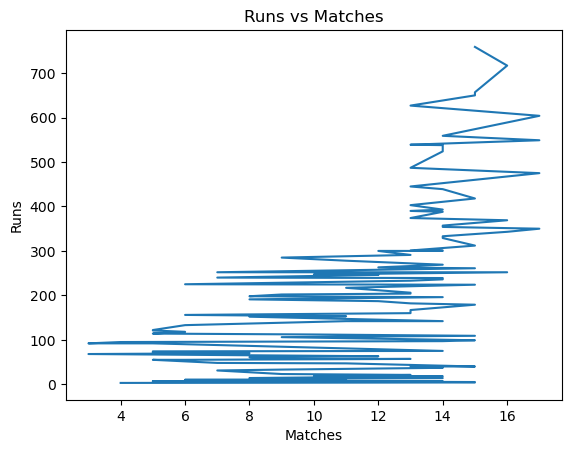

In [168]:
# line plot (Runs vs Matches)
plt.plot(df["Matches"], df["Runs"])
plt.title("Runs vs Matches")
plt.xlabel("Matches")
plt.ylabel("Runs")
plt.show()


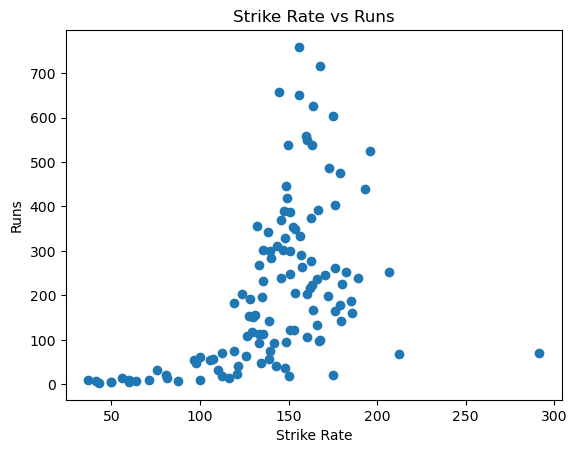

In [169]:
#Scatter plot (Strike Rate vs Runs)- Identifies aggressive vs anchor players.
# Top-right = elite batters, High SR but low runs = impact players
plt.scatter(df["SR"], df["Runs"])
plt.xlabel("Strike Rate")
plt.ylabel("Runs")
plt.title("Strike Rate vs Runs")
plt.show()


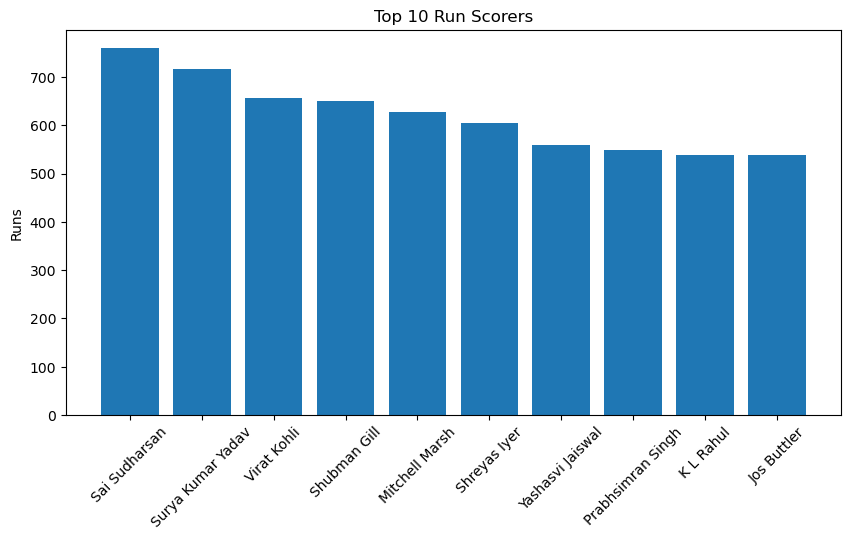

In [171]:
# Bar Plot – Top 10 Run Scorers- Visual ranking clarity
top10 = df.sort_values("Runs", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10["Player Name"], top10["Runs"])
plt.xticks(rotation=45)
plt.title("Top 10 Run Scorers")
plt.ylabel("Runs")
plt.show()


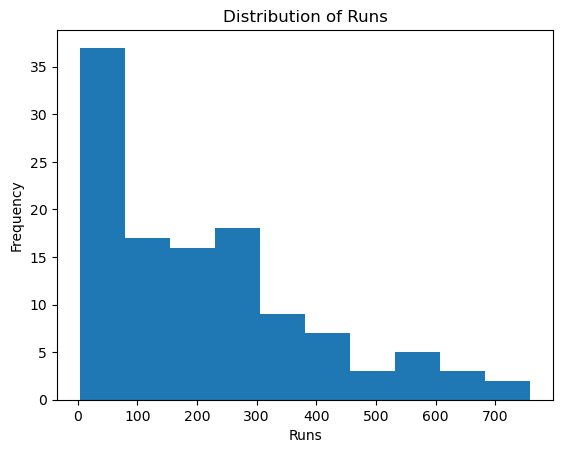

In [172]:
# Histogram – Distribution of Runs- data spread, Most players cluster in mid-range
plt.figure()
plt.hist(df["Runs"], bins=10)
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


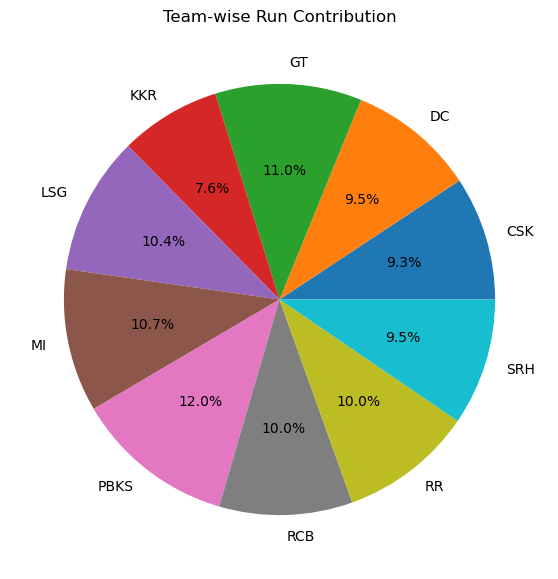

In [173]:
# Pie Chart – Team Contribution, Dominant batting teams have larger slices

team_runs = df.groupby("Team")["Runs"].sum()

plt.figure(figsize=(7,7))
plt.pie(team_runs, labels=team_runs.index, autopct="%1.1f%%")
plt.title("Team-wise Run Contribution")
plt.show()


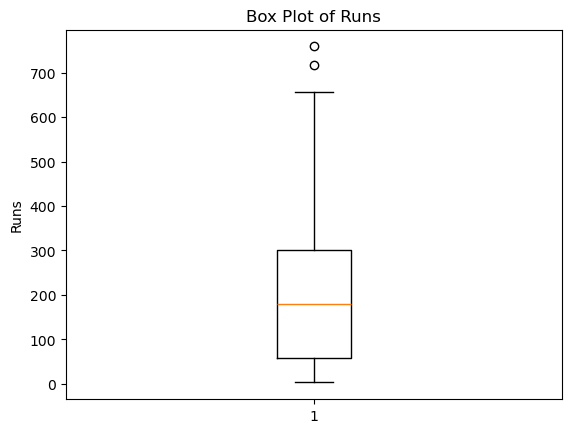

In [174]:
# Box Plot – Runs, Detect outliers & median
# Dots outside whiskers = outliers, Median line shows typical player output
plt.figure()
plt.boxplot(df["Runs"])
plt.title("Box Plot of Runs")
plt.ylabel("Runs")
plt.show()



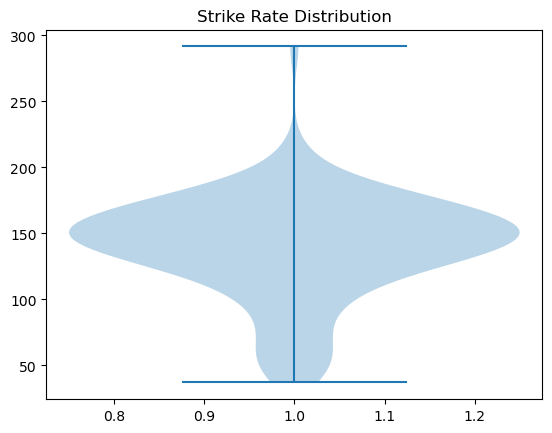

In [175]:
#Violin Plot – Strike Rate, Width shows density,Fat center = common SR range
plt.figure()
plt.violinplot(df["SR"])
plt.title("Strike Rate Distribution")
plt.show()


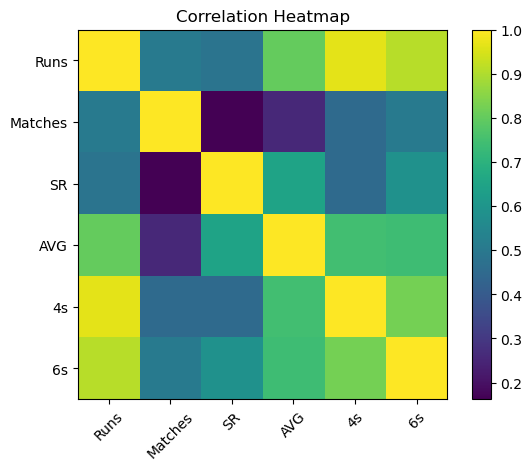

In [176]:
# Heatmap – Correlation Matrix,
# Strong Positive Correlation (close to 1):Runs vs 4s, 6s: Players who score more boundaries tend to score more runs.


corr = df[["Runs","Matches","SR","AVG","4s","6s"]].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


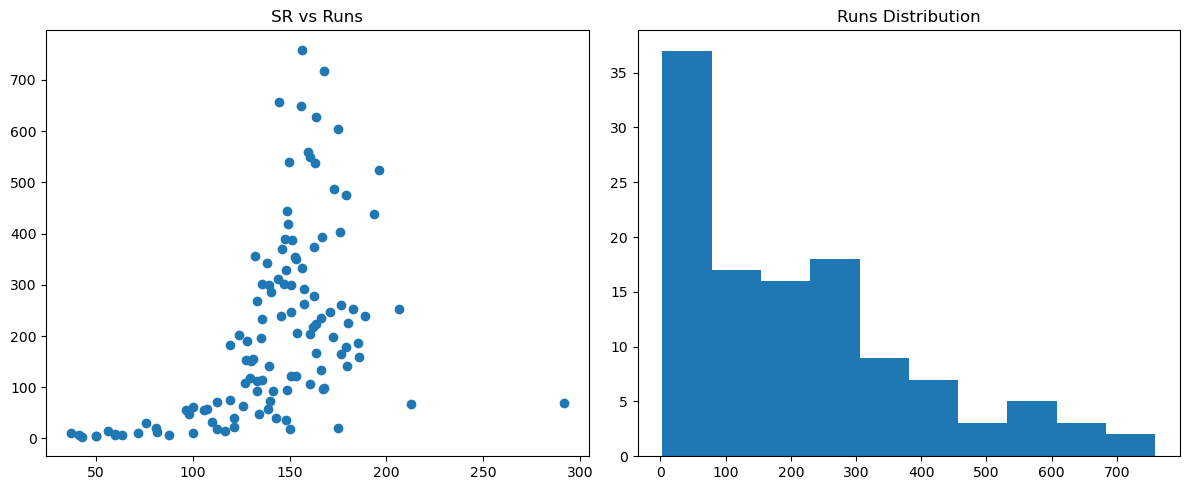

In [177]:
# Subplots – Multiple Views
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].scatter(df["SR"], df["Runs"])
ax[0].set_title("SR vs Runs")

ax[1].hist(df["Runs"], bins=10)
ax[1].set_title("Runs Distribution")

plt.tight_layout()
plt.show()


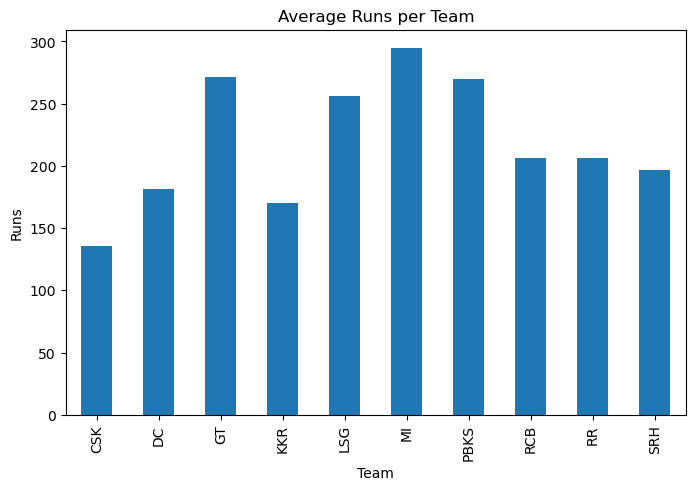

In [178]:
# Groupby Plot – Average Runs per Team, Strong vs weak batting teams clearly visible

df.groupby("Team")["Runs"].mean().plot(kind="bar", figsize=(8,5))
plt.title("Average Runs per Team")
plt.ylabel("Runs")
plt.show()


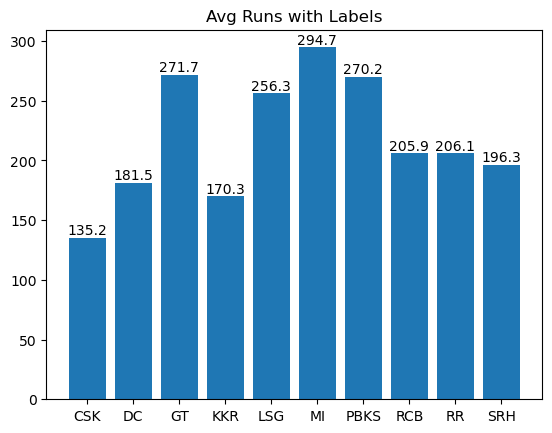

In [179]:
# Data Labels on Bars
avg_runs = df.groupby("Team")["Runs"].mean()

plt.figure()
plt.bar(avg_runs.index, avg_runs.values)

for i, val in enumerate(avg_runs.values):
    plt.text(i, val, round(val,1), ha="center", va="bottom")

plt.title("Avg Runs with Labels")
plt.show()


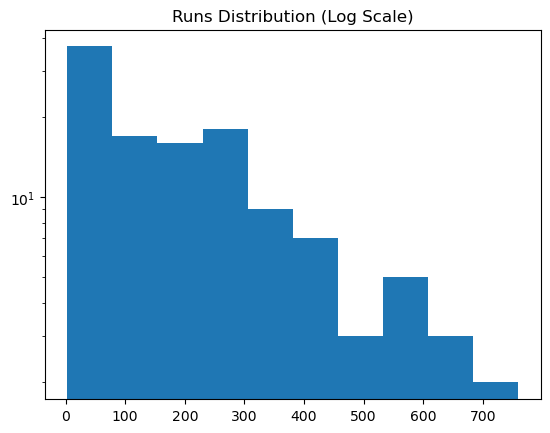

In [180]:
# Log Scale Plot
plt.figure()
plt.hist(df["Runs"])
plt.yscale("log")
plt.title("Runs Distribution (Log Scale)")
plt.show()


In [181]:
# Save Plot
plt.figure()
plt.hist(df["Runs"])
plt.savefig("runs_distribution.png", dpi=300)
plt.close()


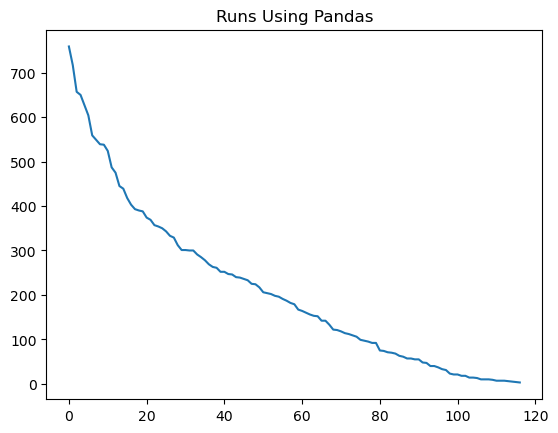

In [182]:
df["Runs"].plot(title="Runs Using Pandas")
plt.show()


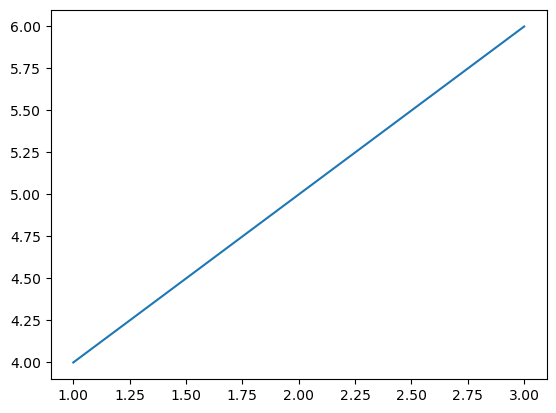

In [183]:
plt.plot([1,2,3],[4,5,6])

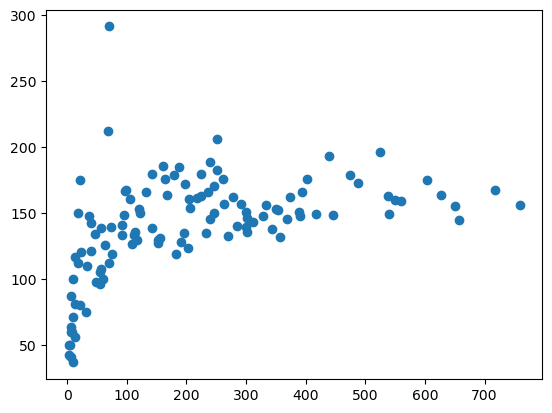

In [184]:
plt.scatter(df['Runs'], df['SR'])